### Normalize continuous variables

# Classification of Fire Types in India Using MODIS Satellite Data (2021–2023) by Pragya K. Singh
## My Week 2 Submission
- Part 2 of week 2 visualisation (updated ipynb file from Normalizing continuous variables to SMOTE) and Ran all cells successfully
- This is based on week-2 Mentoring Session

In [ ]:
scaler = StandardScaler()
numerical_cols_to_scale = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,-0.735900,0,2021,1,4,1,40,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,-0.683381,0,2021,1,4,1,54,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,-0.460175,0,2021,1,4,1,54,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,-0.683381,0,2021,1,4,1,54,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,-1.169182,0,2021,1,4,1,54,True


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189370 entries, 0 to 271207
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   latitude         189370 non-null  float64       
 1   longitude        189370 non-null  float64       
 2   brightness       189370 non-null  float64       
 3   scan             189370 non-null  float64       
 4   track            189370 non-null  float64       
 5   acq_date         189370 non-null  datetime64[ns]
 6   acq_time         189370 non-null  int64         
 7   confidence       189370 non-null  float64       
 8   version          189370 non-null  float64       
 9   bright_t31       189370 non-null  float64       
 10  frp              189370 non-null  float64       
 11  type             189370 non-null  int64         
 12  year             189370 non-null  int32         
 13  month            189370 non-null  int32         
 14  day_of_week      189370 n

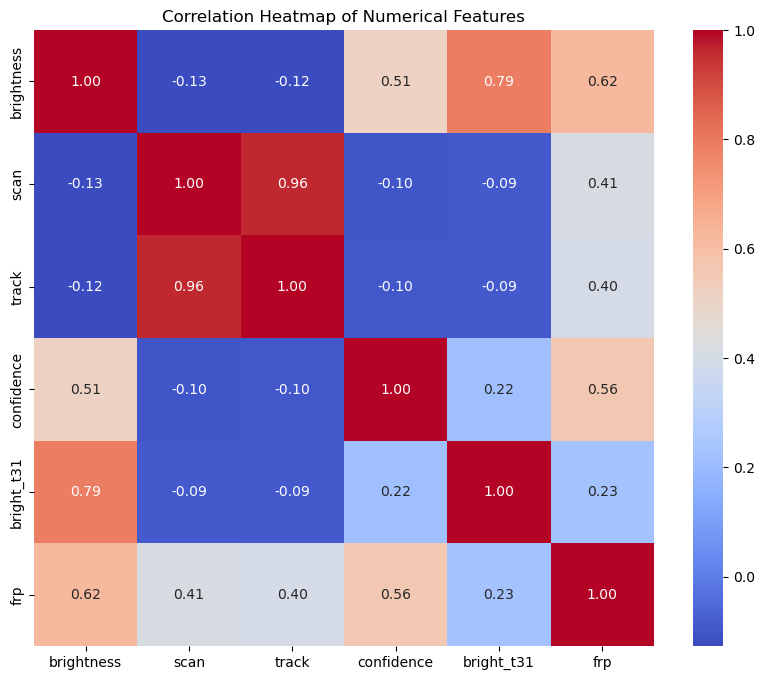

In [ ]:
# Heatmap of correlations between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded[['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
df_encoded.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,version,bright_t31,frp,type,year,month,day_of_week,day_of_year,hour,satellite_Terra
0,28.0993,96.9983,-2.308455,-0.464860,0.059274,2021-01-01,409,-1.319370,6.03,-1.754135,-0.735900,0,2021,1,4,1,40,True
1,30.0420,79.6492,-2.445530,0.588678,0.936416,2021-01-01,547,-1.818736,6.03,-2.471213,-0.683381,0,2021,1,4,1,54,True
3,30.0408,80.0501,-2.422684,0.939857,0.936416,2021-01-01,547,-1.176694,6.03,-2.429843,-0.460175,0,2021,1,4,1,54,True
4,30.6565,78.9668,-2.548336,0.237499,0.059274,2021-01-01,547,-1.390708,6.03,-2.443633,-0.683381,0,2021,1,4,1,54,True
6,31.4366,76.8988,-2.594027,-0.816039,-0.817867,2021-01-01,547,-1.890074,6.03,-2.498792,-1.169182,0,2021,1,4,1,54,True


In [ ]:
df_encoded.type.value_counts()

type
0    182841
2      6501
3        28
Name: count, dtype: int64

In [ ]:
# Separate features (X) and target variable (y)
# Assuming 'type' is the target variable you want to predict
# Drop temporal features if not intended for prediction task that uses 'type' as target
features = ['brightness', 'scan', 'track', 'confidence', 'bright_t31', 'frp']
target = 'type'

X = df_encoded[features]
y = df_encoded[target]


In [ ]:
X

,brightness,scan,track,confidence,bright_t31,frp
0,-2.308455,-0.464860,0.059274,-1.319370,-1.754135,-0.735900
1,-2.445530,0.588678,0.936416,-1.818736,-2.471213,-0.683381
3,-2.422684,0.939857,0.936416,-1.176694,-2.429843,-0.460175
4,-2.548336,0.237499,0.059274,-1.390708,-2.443633,-0.683381
6,-2.594027,-0.816039,-0.817867,-1.890074,-2.498792,-1.169182
...,...,...,...,...,...,...
271199,-0.423680,1.642216,1.813557,-0.605991,0.369517,0.327610
271200,-0.846327,3.398112,2.690698,-1.319370,-0.085551,0.209442
271201,-0.789212,1.993395,1.813557,-1.105356,-0.306191,-0.079412
271204,-0.115262,1.993395,1.813557,0.678093,0.093718,1.679975


In [ ]:
y

0         0
1         0
3         0
4         0
6         0
         ..
271199    0
271200    0
271201    0
271204    0
271207    0
Name: type, Length: 189370, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Initialize SMOTE #week 2
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after resampling
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())

Distribution of target variable after SMOTE:
type
0    182841
2    182841
3    182841
Name: count, dtype: int64
